In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pickle

In [3]:
# Create a df with holidays
from workalendar.europe import Belgium
cal = Belgium()

In [4]:
data4 = pd.read_pickle('Building-4-Voisins BV/building_4_cnsumptions.pkl')
data4.index = pd.to_datetime(data4.index)
#data4['Datetime'] = data4.index
data4

,Valeur
Date,
2018-03-05 00:15:00,4.044
2018-03-05 00:30:00,3.667
2018-03-05 00:45:00,3.567
2018-03-05 01:00:00,3.717
2018-03-05 01:15:00,3.843
...,...
2020-06-30 23:00:00,4.044
2020-06-30 23:15:00,3.944
2020-06-30 23:30:00,3.969


In [5]:
data4['working day'] =  data4.index.to_series().apply(cal.is_working_day)
data4

,Valeur,working day
Date,,
2018-03-05 00:15:00,4.044,True
2018-03-05 00:30:00,3.667,True
2018-03-05 00:45:00,3.567,True
2018-03-05 01:00:00,3.717,True
2018-03-05 01:15:00,3.843,True
...,...,...
2020-06-30 23:00:00,4.044,True
2020-06-30 23:15:00,3.944,True
2020-06-30 23:30:00,3.969,True


In [6]:
data4.info()
data4 = data4[~data4.index.duplicated(keep='last')]
data4 = data4.sort_index()
data4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75840 entries, 2018-03-05 00:15:00 to 2020-01-07 00:00:00
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Valeur       75840 non-null  float64
 1   working day  75840 non-null  bool   
dtypes: bool(1), float64(1)
memory usage: 1.2 MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75832 entries, 2018-01-06 00:00:00 to 2020-12-06 23:45:00
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Valeur       75832 non-null  float64
 1   working day  75832 non-null  bool   
dtypes: bool(1), float64(1)
memory usage: 1.2 MB


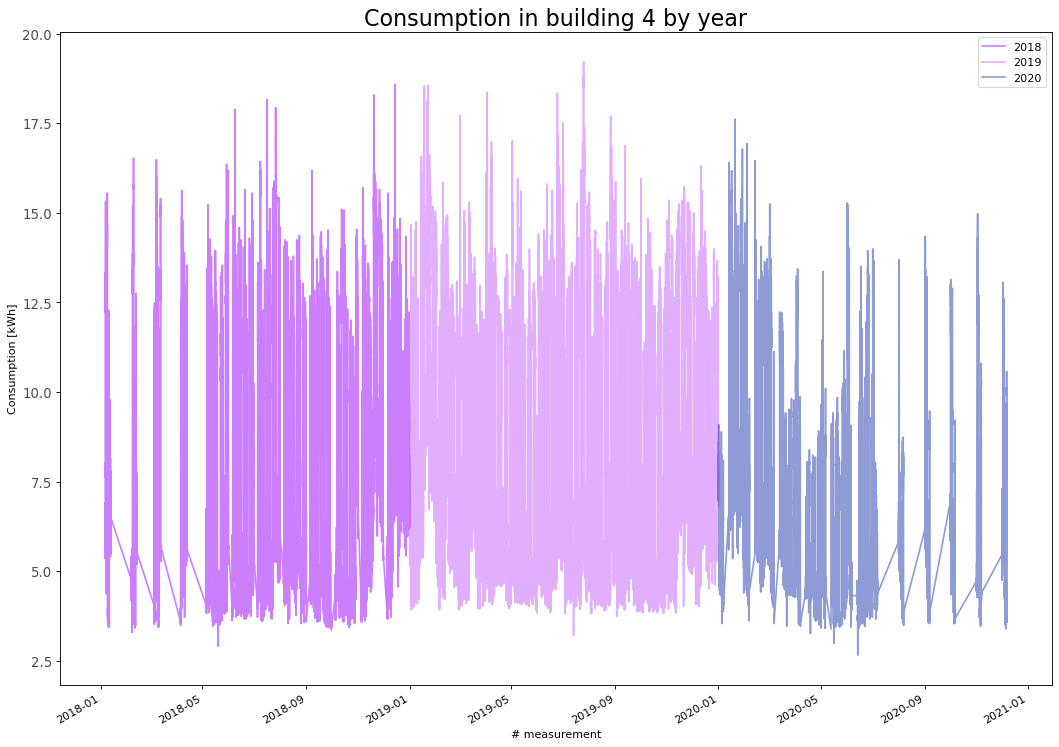

In [9]:
years = data4.index.year.unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False) 

# Draw Plot
fig, ax = plt.subplots(figsize=(16,12), dpi= 80)
for i,year in enumerate(years):
        data_temp=data4.loc[data4.index.year==year, :]
        data_temp.plot(y='Valeur', use_index=True, color=mycolors[i], label = year, ax=ax, alpha=0.5)

# Decoration
plt.gca().set(ylabel='Consumption [kWh]', xlabel='# measurement')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Consumption in building 4 by year", fontsize=20)
plt.show()